In [439]:
import json
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
from hv import HyperVolume

In [440]:

n_particles = 12

if n_particles == 12:
    path_prefix = \
    {
        "Particle-WFR": "/home/tesixiao/YinuoIntern2023/src/MOO/results/particle/mslr/2023-10-09_18-15-25",
        # "Particle-SVGD": "/home/tesixiao/results/svgd/particle/mslr/2023-10-01_06-25-50",
        "PHN-LS": "/home/tesixiao/YinuoIntern2023/src/MOO/results/hyper_ln/mslr/2023-09-30_22-51-40",
        "PHN-EPO": "/home/tesixiao/YinuoIntern2023/src/MOO/results/hyper_epo/mslr/2023-09-30_23-01-46",
        "COSMOS": "/home/tesixiao/YinuoIntern2023/src/MOO/results/cosmos/mslr/2023-09-27_02-03-29",
        "GMOOAR-U": "/home/tesixiao/YinuoIntern2023/src/MOO/results/argmo/mslr/2023-09-29_23-41-45",
        "GMOOAR-HV": "/home/tesixiao/YinuoIntern2023/src/MOO/results/argmo/mslr/2023-09-29_22-40-28",
        # "Pareto-MTL":  "/home/tesixiao/YinuoIntern2023/src/MOO/results/ParetoMTL/mslr/2023-09-30_23-35-06",
    }

if n_particles == 16:
    path_prefix = \
    {
        "Particle-WFR": "/home/tesixiao/YinuoIntern2023/src/MOO/results/particle/mslr/2023-10-09_18-17-52",
        "PHN-LS": "/home/tesixiao/YinuoIntern2023/src/MOO/results/hyper_ln/mslr/2023-10-07_04-53-23",
        "PHN-EPO": "/home/tesixiao/YinuoIntern2023/src/MOO/results/hyper_epo/mslr/2023-10-07_04-57-38",
        "COSMOS": "/home/tesixiao/YinuoIntern2023/src/MOO/results/cosmos/mslr/2023-10-07_04-49-35",
        "GMOOAR-U": "/home/tesixiao/YinuoIntern2023/src/MOO/results/argmo/mslr/2023-10-07_03-09-12",
        "GMOOAR-HV": "/home/tesixiao/YinuoIntern2023/src/MOO/results/argmo/mslr/2023-10-07_03-10-09",
    }


if n_particles == 8:
    path_prefix = \
    {
        "Particle-WFR": "/home/tesixiao/YinuoIntern2023/src/MOO/results/particle/mslr/2023-10-09_16-47-20",
        "PHN-LS": "/home/tesixiao/YinuoIntern2023/src/MOO/results/hyper_ln/mslr/2023-10-08_22-30-18",
        "PHN-EPO": "/home/tesixiao/YinuoIntern2023/src/MOO/results/hyper_epo/mslr/2023-10-08_23-15-46",
        "COSMOS": "/home/tesixiao/YinuoIntern2023/src/MOO/results/cosmos/mslr/2023-10-08_22-22-45",
        "GMOOAR-U": "/home/tesixiao/YinuoIntern2023/src/MOO/results/argmo/mslr/2023-10-08_22-09-39",
        "GMOOAR-HV": "/home/tesixiao/YinuoIntern2023/src/MOO/results/argmo/mslr/2023-10-08_22-19-23",
    }

In [441]:
def get_epoch_and_hv(path_prefix):
    with open(f'{path_prefix}/test_results.json') as f:
        data = json.load(f)
    with open(f'{path_prefix}/train_results.json') as f:
        data_train = json.load(f)
    epochs = []
    hv_values = []
    for key, value in data['start_0'].items():
        epochs.append(int(key.split('_')[1]))
        hv_values.append(value['hv'])
    hv_train_values = []
    reference_point = [4.7] * 6 #[5., 5., 5., 5., 5., 5.]
    hv = HyperVolume(reference_point)
    for key, value in data_train['start_0'].items():
        hv_train_values.append(hv.compute(value['scores']))
    return epochs, hv_values, hv_train_values

In [442]:
results = {m: get_epoch_and_hv(p) for m, p in path_prefix.items()}

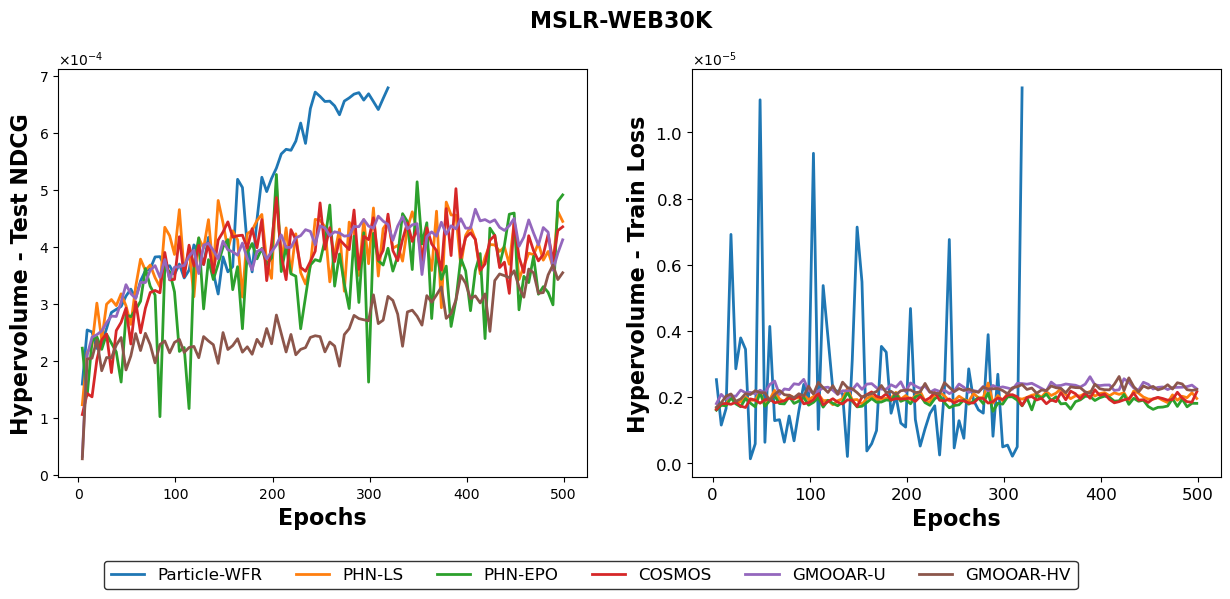

In [443]:

# Set a style for the plot (optional, but provides a nice base styling)
# sns.set_style("whitegrid")
# sns.set_palette("deep")
colors = sns.color_palette()

# Create a new figure with a defined size
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot the data
for idx, (m, r) in enumerate(results.items()):
    axs[0].plot(r[0], r[1], label=m, color=colors[idx],markersize=4, linewidth=2)
    axs[1].plot(r[0], r[2], label=m, color=colors[idx], markersize=4, linewidth=2)

# plt.plot(epochs, hv_values, 's--', label='cosmos', markersize=4, linewidth=2)
# plt.plot(epochs2, hv_values2, 'o-', label='particle', markersize=4, linewidth=2)
# plt.plot(epochs3, hv_values3, '^-.', label='argmo', markersize=4, linewidth=2)

# Setting the label for x and y axis
axs[0].set_xlabel('Epochs', fontsize=16, fontweight='bold')
axs[0].set_ylabel('Hypervolume - Test NDCG', fontsize=16, fontweight='bold')

axs[1].set_xlabel('Epochs', fontsize=16, fontweight='bold')
axs[1].set_ylabel('Hypervolume - Train Loss', fontsize=16, fontweight='bold')

y_formatter = ScalarFormatter(useMathText=True)
y_formatter.set_scientific(True)
y_formatter.set_powerlimits((-3,3))  # Adjust limits if needed
axs[0].yaxis.set_major_formatter(y_formatter)
y_formatter = ScalarFormatter(useMathText=True)
y_formatter.set_scientific(True)
y_formatter.set_powerlimits((-3,3))  # Adjust limits if needed
axs[1].yaxis.set_major_formatter(y_formatter)

# Setting the title with a slight increase in the font size
fig.suptitle('MSLR-WEB30K', fontsize=16, fontweight='bold')

# Display the legend and specify its location
lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines, labels, loc='lower left', bbox_to_anchor=(0.18, 0), fontsize=12, ncol=6, frameon=True, edgecolor='black')

plt.subplots_adjust(hspace=1, bottom=0.2)

# Adjusting the tick parameters
plt.tick_params(axis='both', which='major', labelsize=12)
# plt.tight_layout()

# Finally, display the plot
plt.show()


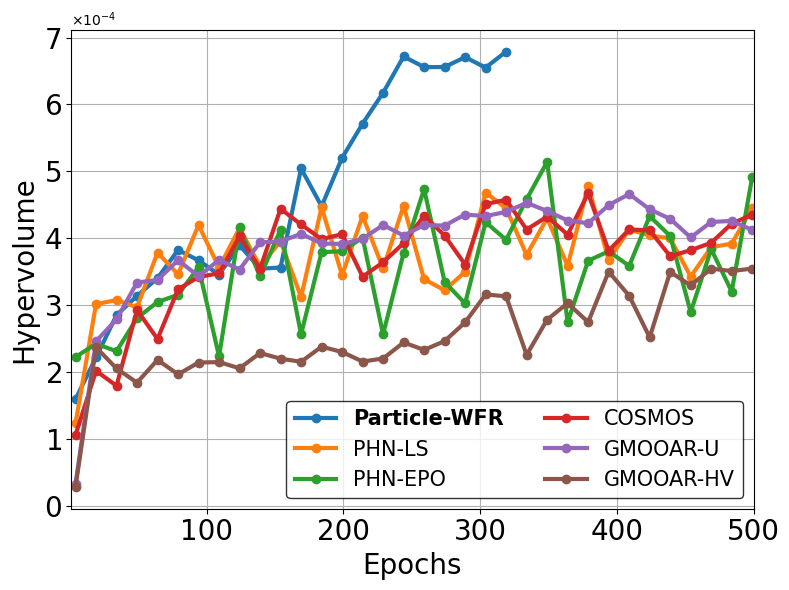

In [444]:
def downsample(data, step=3):
    """Downsample a list by taking every nth element."""
    return data[::step]

# Set a style for the plot (optional, but provides a nice base styling)
# sns.set_style("whitegrid")
# sns.set_palette("deep")
colors = sns.color_palette()

# Create a new figure with a defined size
plt.figure(figsize=(8, 6))

# Plot the data
for m, r in results.items():
    plt.plot(downsample(r[0]), downsample(r[1]), 'o-', label=m, markersize=6, linewidth=3)

# Setting the label for x and y axis
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Hypervolume', fontsize=20)
plt.xlim(1, 500)

# Setting the title with a slight increase in the font size
# plt.title('MSLR-WEB30K', fontsize=16, fontweight='bold')

# Display the legend and specify its location
legend = plt.legend(loc='lower right', ncols=2, fontsize=15, frameon=True, edgecolor='black')

# Setting the second label in the legend to bold
for i, text in enumerate(legend.get_texts()):
    if i == 0:  # Index of the label you want to make bold
        text.set_weight('bold')


y_formatter = ScalarFormatter(useMathText=True)
y_formatter.set_scientific(True)
y_formatter.set_powerlimits((-3,3))  # Adjust limits if needed
plt.gca().yaxis.set_major_formatter(y_formatter)

# Adjusting the tick parameters
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid()
plt.tight_layout()

# Finally, display the plot
# plt.show()

plt.savefig(f'mslr_{n_particles}.pdf')
